In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Enter the data

In [2]:
data_df = pd.read_csv("EconomiesOfScale.csv")

In [3]:
data_df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [4]:
data_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.7 KB


In [6]:
data_df.shape

(1000, 2)

Visualization

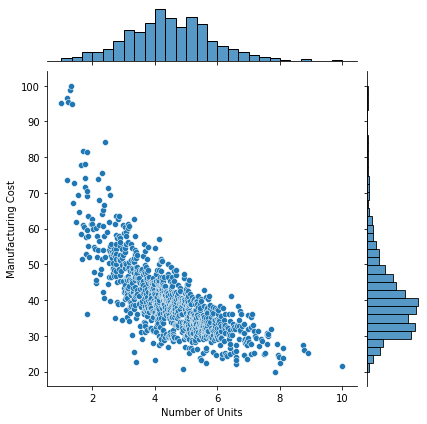

In [7]:
sns.jointplot(data=data_df,x="Number of Units",y="Manufacturing Cost")

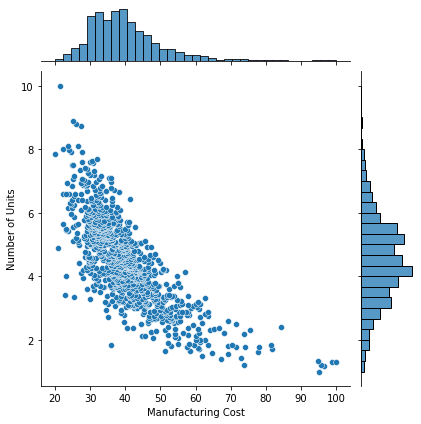

In [8]:
sns.jointplot(data=data_df,x="Manufacturing Cost",y="Number of Units")

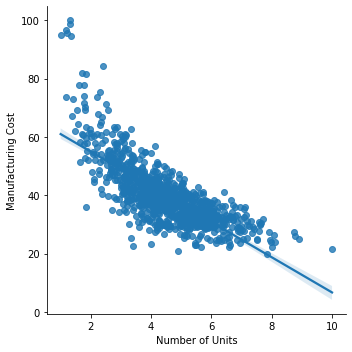

In [9]:
sns.lmplot(data=data_df,x="Number of Units",y="Manufacturing Cost")

training data

In [10]:
x = data_df[["Number of Units"]]

In [11]:
y = data_df[["Manufacturing Cost"]]

In [12]:
x_train = x
y_train = y

Linear regression fitting

In [13]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
print("Linear model coeff(m):: {} and intercept(b)::".format(regressor.coef_,regressor.intercept_))

Linear model coeff(m):: [[-6.0333683]] and intercept(b)::


Text(0.5, 1.0, 'linear fitting')

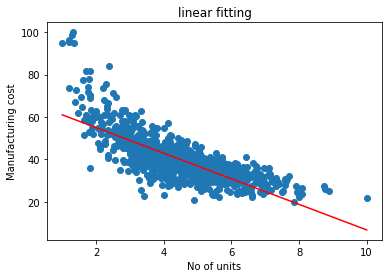

In [23]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.xlabel("No of units")
plt.ylabel("Manufacturing cost")
plt.title("linear fitting")

Polynomial fitting

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
poly_regressor = PolynomialFeatures(degree = 5)
x_columns = poly_regressor.fit_transform(x_train)
x_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, 1.66819606e+00,
        1.97846993e+00, 2.34645277e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, 1.69153369e+00,
        2.01546010e+00, 2.40141796e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, 6.77041565e+02,
        5.94502623e+03, 5.22026103e+04],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, 7.04422522e+02,
        6.26774007e+03, 5.57684690e+04],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05]])

In [88]:
regressor = LinearRegression()
regressor.fit(x_columns,y_train)

LinearRegression()

In [89]:
print("Model coeff",regressor.coef_)

Model coeff [[ 0.00000000e+00 -9.24985286e+01  3.06811266e+01 -5.35771972e+00
   4.64221376e-01 -1.56845726e-02]]


In [90]:
y_predict = regressor.predict(poly_regressor.fit_transform(x_train))

Text(0.5, 1.0, 'Polynomial fitting')

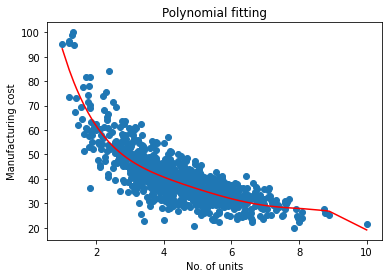

In [92]:
plt.scatter(x_train,y_train)
plt.plot(x_train, y_predict, color='red')
plt.xlabel("No. of units")
plt.ylabel("Manufacturing cost")
plt.title("Polynomial fitting")